In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all
There are 3 directories and 0 images in /content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/test
There are 0 directories and 38 images in /content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/test/adidas
There are 0 directories and 38 images in /content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/test/nike
There are 0 directories and 38 images in /content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/test/converse
There are 3 directories and 0 images in /content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train
There are 0 directories and 237 images in /content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train/converse
There are 0 directories and 237 images in /content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train/nike
There are 0 directories and 237 images in /content/drive/MyDrive/Colab Notebooks/data(Selected S

read data

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/test"

In [ ]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['adidas' 'converse' 'nike']


explore data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (240, 240, 3)


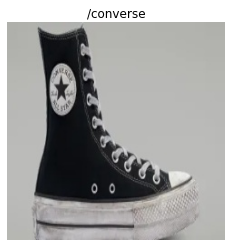

In [ ]:
img = view_random_image(target_dir = "/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train",target_class="/converse")

Image shape: (240, 240, 3)


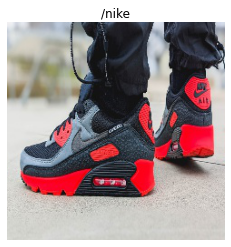

In [ ]:
img = view_random_image(target_dir = "/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train",target_class="/nike")

Image shape: (240, 240, 3)


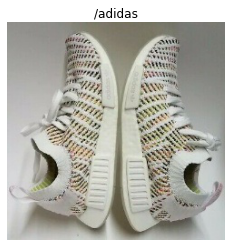

In [ ]:
img = view_random_image(target_dir = "/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train",target_class="/adidas")

prepare data

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./ 255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./ 255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (240,240), class_mode = "categorical", shuffle = False)
test_data = test_datagen.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (240,240), class_mode = "categorical")

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (240,240, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(3, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

Use model # fail

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(train_data, epochs = 20, steps_per_epoch = len(train_data), 
                    validation_data = test_data, validation_steps = int(0.25 * len(test_data)))

Epoch 1/20
23/23 [==============================] - 157s 6s/step - loss: 1.3847 - accuracy: 0.2940 - val_loss: 1.1012 - val_accuracy: 0.3438
Epoch 2/20
23/23 [==============================] - 48s 2s/step - loss: 1.1010 - accuracy: 0.2714 - val_loss: 1.1020 - val_accuracy: 0.3125
Epoch 3/20
23/23 [==============================] - 44s 2s/step - loss: 1.1008 - accuracy: 0.2264 - val_loss: 1.0952 - val_accuracy: 0.4375
Epoch 4/20
23/23 [==============================] - 43s 2s/step - loss: 1.0992 - accuracy: 0.2278 - val_loss: 1.0983 - val_accuracy: 0.3438
Epoch 5/20
23/23 [==============================] - 42s 2s/step - loss: 1.0994 - accuracy: 0.3291 - val_loss: 1.0978 - val_accuracy: 0.3438
Epoch 6/20
23/23 [==============================] - 42s 2s/step - loss: 1.0989 - accuracy: 0.3165 - val_loss: 1.1011 - val_accuracy: 0.2812
Epoch 7/20
23/23 [==============================] - 42s 2s/step - loss: 1.0992 - accuracy: 0.3333 - val_loss: 1.0977 - val_accuracy: 0.3438
Epoch 8/20
23/23 [=

Use model # success

In [ ]:
#transfer learning

base_model = tf.keras.applications.ResNet50V2(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (240, 240, 3), name = 'InputLayer')
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
x = tf.keras.layers.Dense(512, activation = 'softmax', name = 'Dense_layer')(x)
x = Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax', name = 'output_layer')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])
history = model.fit(train_data, epochs = 20, steps_per_epoch = len(train_data), 
                    validation_data = test_data, validation_steps = int(0.25 * len(test_data)))

94683136/94668760 [==============================] - 1s 0us/step
Epoch 1/20
23/23 [==============================] - 128s 5s/step - loss: 1.1078 - accuracy: 0.2911 - val_loss: 1.1006 - val_accuracy: 0.1875
Epoch 2/20
23/23 [==============================] - 125s 5s/step - loss: 1.0994 - accuracy: 0.3629 - val_loss: 1.0909 - val_accuracy: 0.5625
Epoch 3/20
23/23 [==============================] - 126s 5s/step - loss: 1.0941 - accuracy: 0.3980 - val_loss: 1.0783 - val_accuracy: 0.5938
Epoch 4/20
23/23 [==============================] - 123s 5s/step - loss: 1.0817 - accuracy: 0.4416 - val_loss: 1.0703 - val_accuracy: 0.5625
Epoch 5/20
23/23 [==============================] - 122s 5s/step - loss: 1.0702 - accuracy: 0.5373 - val_loss: 1.0678 - val_accuracy: 0.5312
Epoch 6/20
23/23 [==============================] - 124s 5s/step - loss: 1.0685 - accuracy: 0.5626 - val_loss: 1.0745 - val_accuracy: 0.5625
Epoch 7/20
23/23 [==============================] - 124s 5s/step - loss: 1.0474 - accurac

In [ ]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

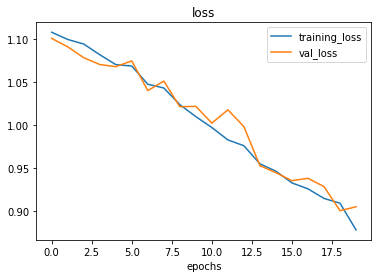

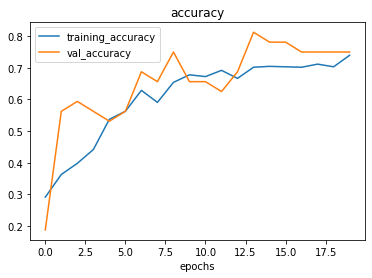

In [ ]:
plot_loss_curves(history)

In [ ]:
model.evaluate(test_data)

4/4 [==============================] - 18s 4s/step - loss: 0.9188 - accuracy: 0.7368


[0.918826699256897, 0.7368420958518982]

model 2#

In [ ]:
# Import dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import datetime
import itertools
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

prepare

In [ ]:
# Setup the training and the test directory paths
trainDir = "/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/train"
testDir = "/content/drive/MyDrive/Colab Notebooks/data(Selected Sub.)/all/test"

# Define the hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create the train and test data 
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = trainDir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical',
                                                                batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = testDir,
                                                               image_size = IMG_SIZE, 
                                                               label_mode = 'categorical',
                                                               batch_size = BATCH_SIZE,
                                                               shuffle = False) # do not shuffle test data for prediction analysis

Found 711 files belonging to 3 classes.
Found 114 files belonging to 3 classes.


In [ ]:
# Create the Tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [ ]:
# Create the data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2), 
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    # preprocessing.Rescaling(1/255.) # rescale inputs of images to between 0 & 1, required for models like ResNet50 (EfficientNetB0 has rescale built-in.)
])

In [ ]:
# Create the checkpoint path
checkpoint_path = 'shoe_vision_model_checkpoint/checkpoint.ckpt'
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

use model #2

In [ ]:
# Setup the base model and freeze its layers
baseModel = tf.keras.applications.EfficientNetB0(include_top = False)
baseModel.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape = (224, 224, 3), name = 'input_layer')
x = data_augmentation(inputs) # augment images
x = baseModel(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'global_avg_pool_layer')(x)
outputs = layers.Dense(3, activation = 'softmax', name = 'output_layer')(x)
shoe_vision_model = tf.keras.Model(inputs, outputs)

# Compile the model 
shoe_vision_model.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

# Fit the model 
history_shoe_vision_model = shoe_vision_model.fit(train_data,
                                                  epochs = 50,
                                                  steps_per_epoch = len(train_data),
                                                  validation_data = test_data,
                                                  validation_steps = int(0.25 * len(test_data)),
                                                  callbacks = [create_tensorboard_callback(dir_name = 'training_logs',
                                                                                           experiment_name = 'shoe_vision_efficientnetb0'),
                                                              checkpoint_callback])

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: training_logs/shoe_vision_efficientnetb0/20220928-145121
Epoch 1/50
23/23 [==============================] - 59s 2s/step - loss: 1.0925 - accuracy: 0.4163 - val_loss: 0.9165 - val_accuracy: 0.5625
Epoch 2/50
23/23 [==============================] - 49s 2s/step - loss: 0.8404 - accuracy: 0.6582 - val_loss: 0.8928 - val_accuracy: 0.5625
Epoch 3/50
23/23 [==============================] - 47s 2s/step - loss: 0.7306 - accuracy: 0.7257 - val_loss: 0.8871 - val_accuracy: 0.5312
Epoch 4/50
23/23 [==============================] - 50s 2s/step - loss: 0.6415 - accuracy: 0.7665 - val_loss: 0.7351 - val_accuracy: 0.6875
Epoch 5/50
23/23 [==============================] - 54s 2s/step - loss: 0.5942 - accuracy: 0.7876 - val_loss: 0.7041 - val_accuracy: 0.7188
Epoch 6/50
23/23 [==============================] - 53s 2s/step - loss: 0.5511 - accuracy: 0.8031 - val_loss: 0.7238 - val_accuracy: 0.7188
Epoch

Validation

In [ ]:
# Evaluate our model on the whole test data
results_shoe_vision_model = shoe_vision_model.evaluate(test_data, verbose = 0)
print("Validation Loss: : {:.3f}, Validation Accuracy: {:.3f}".format(results_shoe_vision_model[0], results_shoe_vision_model[1]))

Validation Loss: : 0.474, Validation Accuracy: 0.816


In [ ]:
# Define a function to plot loss curves
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

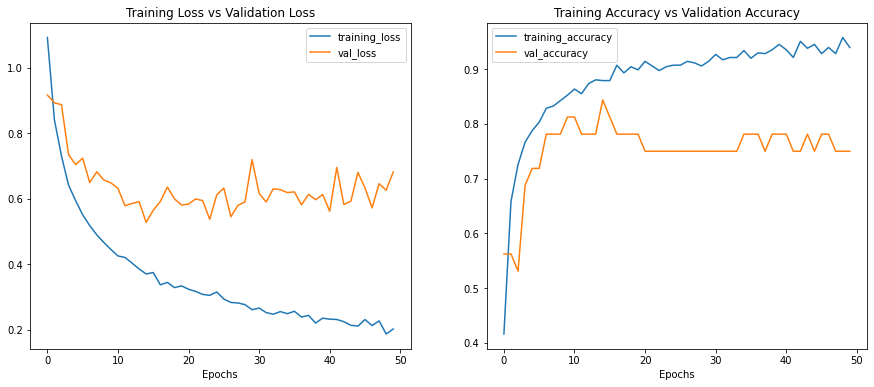

In [ ]:
# Let's plot the loss curves
plot_loss_curves(history_shoe_vision_model)

สรุป 
จากกราฟ ค่าของtraining loss และ validation loss ใน model keras ทั้งแบบBasic form และแบบcallbacks พบว่า รูปแบบBasic form มีค่าtrainingและvalidateไปในทิศทางเดียวกัน ถึงแม้จะมีค่า Accuracyเท่ากันก็ตาม จึงเลือก Keras แบบBasic form เพราะมีความเสถียรมากที่สุด